In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#drive.mount('/drive')
data = pd.read_csv('cc.csv')


# Droping rows with missing values
data.dropna(inplace=True)

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(data.drop('CUST_ID', axis=1))


pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

principalData = pd.DataFrame(data = X_pca, columns = ['PCA 1'])
finalData = pd.concat([principalData, data[['TENURE']]], axis = 1)
finalData.head()


,PCA 1,TENURE
0,-1.696395,12.0
1,-1.215681,12.0
2,0.935853,12.0
3,-1.614638,NaN
4,0.223701,12.0


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=42)

#Applying KMeans to the PCA result
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

silhouette_score(X_pca, y_kmeans)


0.4597328264280838

# New Section

In [24]:
# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('CUST_ID', axis=1))

# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply k-means to PCA
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

# Evaluating the performance
silhouette_score(X_pca, y_kmeans)


0.4597332593270033

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

#loading the dataset into dataframes
#drive.mount('/drive')
dataSet = pd.read_csv('pd_speech_features.csv')

#Separating the features(X) from target variable(y)
X = dataSet.iloc[:, 1:-1].values
y = dataSet.iloc[:, -1].values

# applying scaling to the features
scaler = StandardScaler()
X = scaler.fit_transform(X)


# applying PCA to reduce the dimensionality of the dataset
pca = PCA(n_components=3)
X = pca.fit_transform(X)
principalData = pd.DataFrame(data = X, columns = ['PCA 1', 'PCA 2', 'PCA 3'])

finalDf = pd.concat([principalData, dataSet[['class']]], axis = 1)
finalDf.head()

,PCA 1,PCA 2,PCA 3,class
0,-10.034309,1.473186,-6.836297,1
1,-10.624667,1.585846,-6.820880,1
2,-13.503155,-1.251541,-6.809195,1
3,-9.143503,8.834664,15.302885,1
4,-6.752753,4.612584,15.649154,1


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# splitting the training and testing sets using the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# using SVM model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# calculating the performance by calculating accuracy, precision, recall and f1
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1 score: ", f1)

Accuracy:  0.775330396475771
Precision:  0.7699530516431925
Recall:  0.9879518072289156
F1 score:  0.8654353562005278


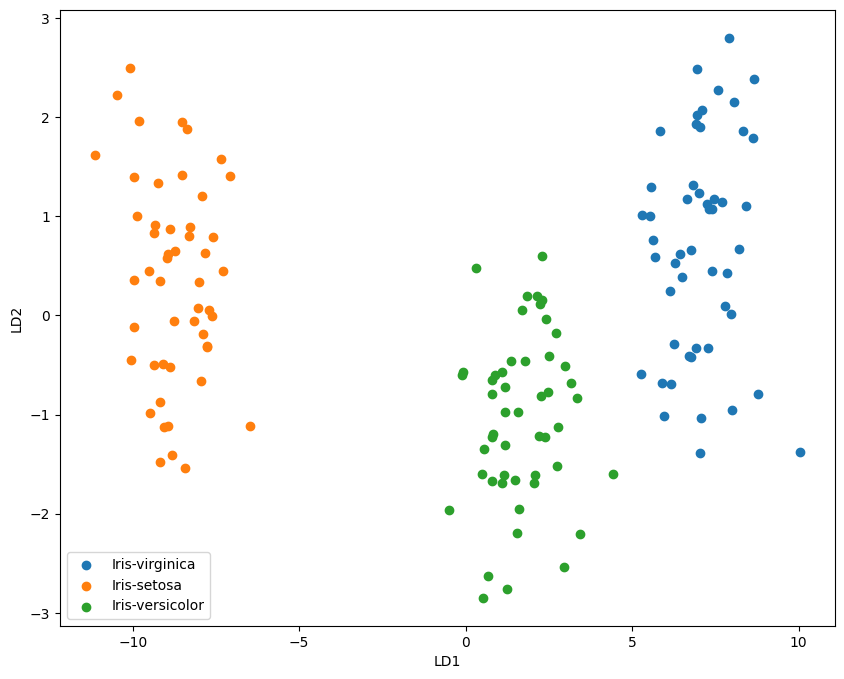

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# loading the iris dataset from CSV file
dataSet = pd.read_csv('Iris.csv')

# separating the features and target variables
X = dataSet.iloc[:, :-1].values
y = dataSet.iloc[:, -1].values

# standardizing the features
sc = StandardScaler()
X = sc.fit_transform(X)

# applying LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)
import matplotlib.pyplot as plt

# visualizing the reduced-dimensional data
plt.figure(figsize=(10, 8))
for species in set(y):
    plt.scatter(X_lda[y == species, 0], X_lda[y == species, 1], label=species)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

In [ ]:
# @title Default title text
The goals of LDA and PCA are to maximize variance in a lower-dimensional space using linear transformations.

Principal Component Analysis (PCA) is an unsupervised learning method that seeks a new set of orthogonal variables, known as principal components, which capture the most variance in the data. The first principal component accounts for the greatest variance, with each subsequent component explaining progressively less. PCA is often used for exploratory data analysis and visualization.

Linear Discriminant Analysis (LDA), on the other hand, is a supervised learning method that finds a linear combination of features that best separates different classes in the data. The goal of LDA is to maximize the variance between classes while minimizing the variance within each class. LDA is commonly used in classification tasks to predict the class of new observations based on their features.

In summary, PCA is an unsupervised technique for dimensionality reduction that identifies principal components explaining the most variance in the data, while LDA is a supervised technique for dimensionality reduction that finds the linear combinations of features that best separate the classes in the data.